TECHNIKI PROGRAMOWANIA - projekt 3 (podstawowe wymagania + wykrywanie krawędzi korzystając z filtracji)

Jakub Staniszewski 203647


Jakub Szymański 203303


Wykorzystane biblioteki:


matplotplusplus

soundfile (python)

WIZUALIZACJA WYKRESÓW 

In [7]:
import numpy as np
import signal_processing as sp

In [8]:
def test_signal_generation():
    print("Generowanie i wizualizacja sygnałów...")
    types = ["SINE", "COSINE", "SQUARE", "SAWTOOTH"]
    for t in types:
        signal_type = getattr(sp.SignalType, t)
        signal = sp.generate_signal(signal_type, frequency=5, sample_rate=1000, duration=1)
        sp.plot_signal(signal, title=f"{t} Wave")

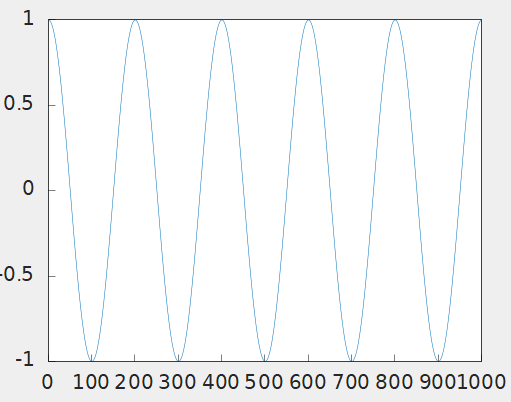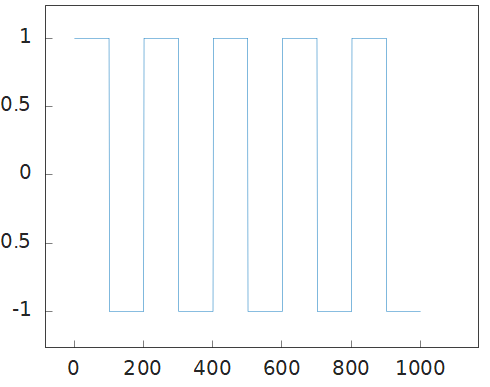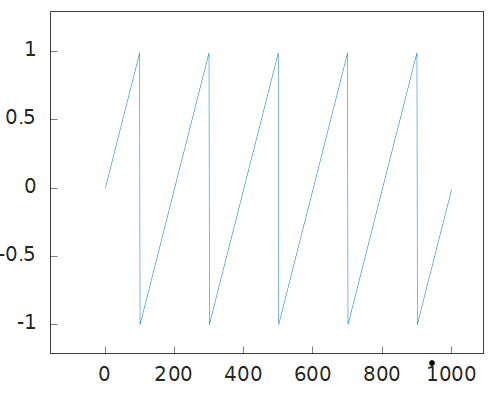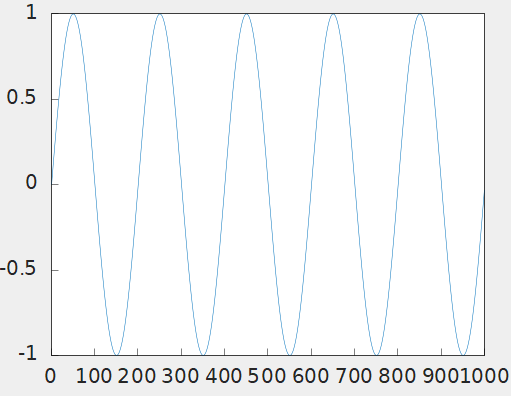

TEST DFT I IDFT

In [9]:
def test_dft_idft():
    print("Test DFT i IDFT - pojedyncza sinusoida...")
    signal = sp.generate_signal(sp.SignalType.SINE, 5, 1000, 1)
    spectrum = sp.dft(signal)
    recovered = sp.idft(spectrum)
    sp.plot_signal(np.real(recovered), title="Recovered signal (IDFT) - single sine")
    sp.plot_dft(signal)

    print("Test DFT i IDFT - suma dwóch sinusoid...")
    t = np.linspace(0, 1, 1000)
    freq1, freq2 = 5, 20
    signal2 = np.sin(2 * np.pi * freq1 * t) + 0.5 * np.sin(2 * np.pi * freq2 * t)
    spectrum2 = sp.dft(signal2)
    recovered2 = sp.idft(spectrum2)
    sp.plot_signal(np.real(recovered2), title="Recovered signal (IDFT) - sum of two sines")
    sp.plot_dft(signal2)

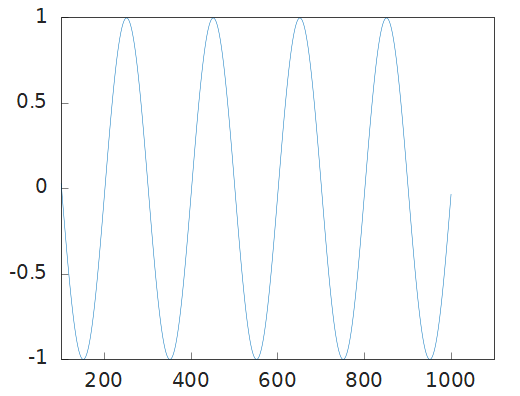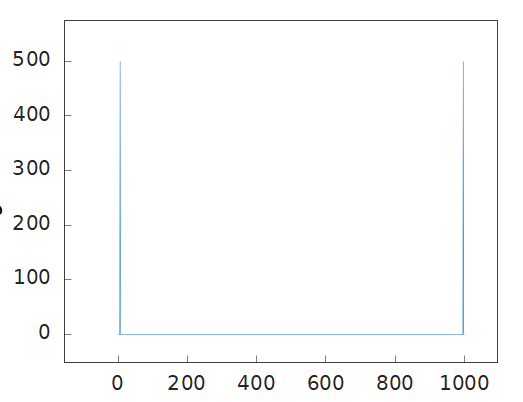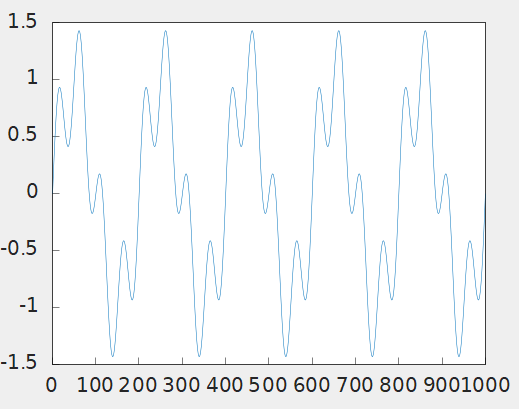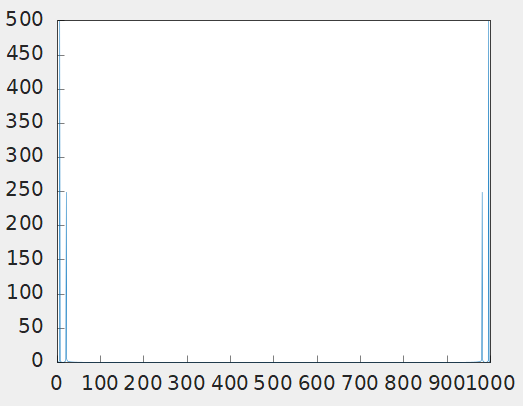

In [10]:
def test_1d_filter():
    print("Test filtracji 1D...")
    signal = sp.generate_signal(sp.SignalType.SINE, 50, 1000, 1)
    noisy = signal + 0.5 * np.random.randn(len(signal))
    filtered = sp.low_pass_filter(noisy)
    sp.plot_signal(noisy, title="Noisy Signal")
    sp.plot_signal(filtered, title="Filtered Signal (1D)")

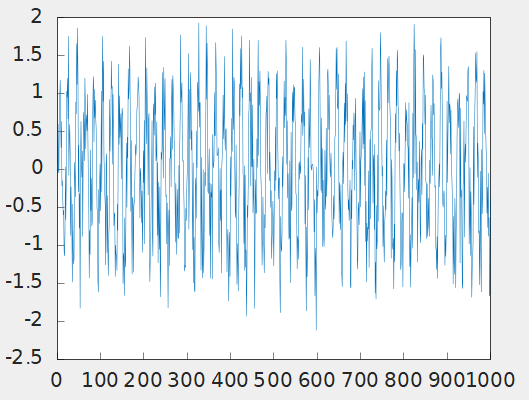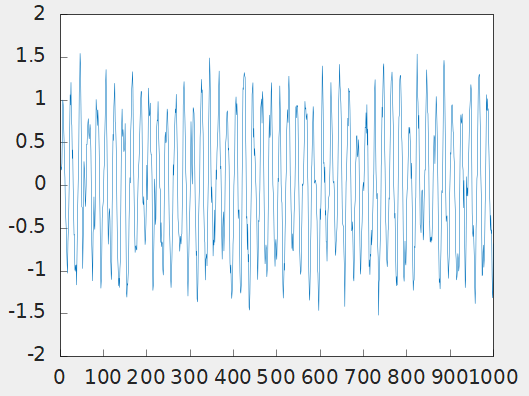

In [11]:
def test_2d_filter_and_edge_detection():
    print("Test filtracji 2D i wykrywania krawędzi...")
    image = np.outer(np.linspace(0, 1, 100), np.ones(100))
    sp.plot_image(image, title="Original Image (2D gradient)")

    smoothed = sp.low_pass_filter_2d(image)
    sp.plot_image(smoothed, title="Low-Pass Filtered Image (2D)")

    edge_kernel = [[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]]
    edges = sp.convolve_2d(image, edge_kernel)
    sp.plot_image(edges, title="Edge Detection (Sobel X)")

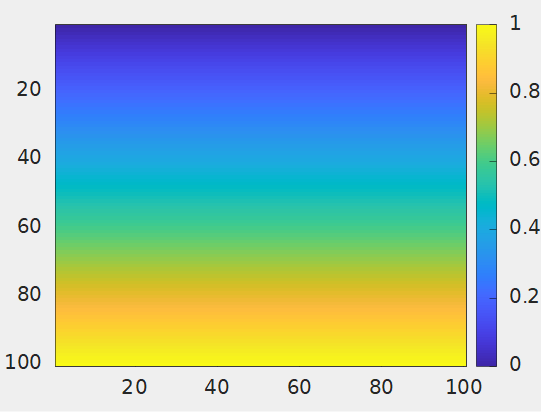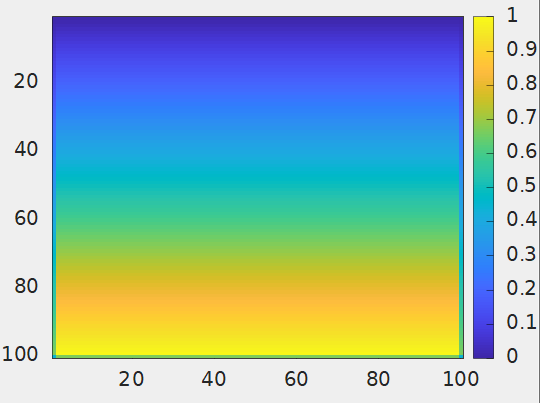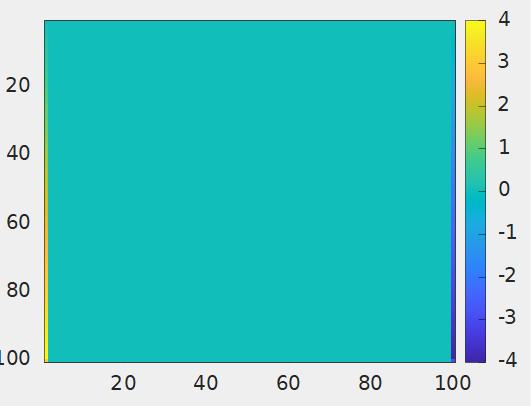

In [12]:
def main():
    test_signal_generation()
    test_dft_idft()
    test_1d_filter()
    test_2d_filter_and_edge_detection()
    print("\n Wszystkie testy zakończone.")

if __name__ == "__main__":
    main()

Generowanie i wizualizacja sygnałów...
Test DFT i IDFT - pojedyncza sinusoida...
Test DFT i IDFT - suma dwóch sinusoid...
Test filtracji 1D...
Test filtracji 2D i wykrywania krawędzi...

 Wszystkie testy zakończone.
